# **Imports**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Dataset & Check**

In [4]:
crab_src_df = pd.read_csv("CrabAgePrediction.csv") # Raw unfiltered filter
crab_src_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [5]:
# Adding a new feature called Approximate Meat Weight
crab_src_df [ 'Approx Meat Weight' ] = crab_src_df [ 'Shucked Weight' ] - crab_src_df [ 'Viscera Weight' ] 
crab_src_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Approx Meat Weight
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,6.747181
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.921359
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1.630096
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,2.466406
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1.970290


In [6]:
# check total data row
crab_src_df.shape

(3893, 10)

In [7]:
# check for missing values
crab_src_df.isnull().sum()

Sex                   0
Length                0
Diameter              0
Height                0
Weight                0
Shucked Weight        0
Viscera Weight        0
Shell Weight          0
Age                   0
Approx Meat Weight    0
dtype: int64

In [87]:
# check for duplicated data
crab_src_df.duplicated().sum()


0

In [88]:
crab_src_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Approx Meat Weight
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791,5.070796
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967,3.568388
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,-0.056699
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000,2.324659
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000,4.465046
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000,7.144074
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000,28.051830


In [89]:
crab_src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 3893 non-null   object 
 1   Length              3893 non-null   float64
 2   Diameter            3893 non-null   float64
 3   Height              3893 non-null   float64
 4   Weight              3893 non-null   float64
 5   Shucked Weight      3893 non-null   float64
 6   Viscera Weight      3893 non-null   float64
 7   Shell Weight        3893 non-null   float64
 8   Age                 3893 non-null   int64  
 9   Approx Meat Weight  3893 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 304.3+ KB


In [11]:
#create get dummy for Sex
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

    
# Applying variable to new 
crab_data_df = encode_and_bind(crab_src_df, 'Sex')

crab_data_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Approx Meat Weight,Sex_F,Sex_I,Sex_M
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,6.747181,1,0,0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.921359,0,0,1
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1.630096,0,1,0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,2.466406,1,0,0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1.970290,0,1,0


In [12]:
crab_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 3893 non-null   object 
 1   Length              3893 non-null   float64
 2   Diameter            3893 non-null   float64
 3   Height              3893 non-null   float64
 4   Weight              3893 non-null   float64
 5   Shucked Weight      3893 non-null   float64
 6   Viscera Weight      3893 non-null   float64
 7   Shell Weight        3893 non-null   float64
 8   Age                 3893 non-null   int64  
 9   Approx Meat Weight  3893 non-null   float64
 10  Sex_F               3893 non-null   uint8  
 11  Sex_I               3893 non-null   uint8  
 12  Sex_M               3893 non-null   uint8  
dtypes: float64(8), int64(1), object(1), uint8(3)
memory usage: 315.7+ KB


# **EDA**

In [13]:
crab_data_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Approx Meat Weight,Sex_F,Sex_I,Sex_M
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,6.747181,1,0,0
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.921359,0,0,1
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1.630096,0,1,0
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,2.466406,1,0,0
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1.970290,0,1,0


### 1 What is the correlation beween the crab age and its features?

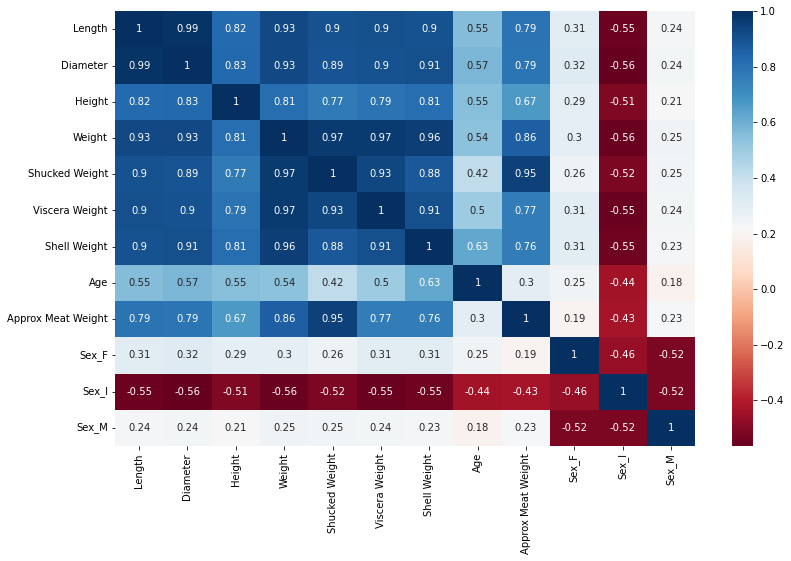

In [14]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(13,8))         

# sns.heatmap(hd_pre_illness_df)
dataplot = sns.heatmap(crab_data_df.corr(), cmap="RdBu", annot=True)
  
# displaying heatmap
plt.show()

In [15]:
crab_data_df.value_counts(('Sex'))

Sex
M    1435
I    1233
F    1225
dtype: int64

### 2. What is the the total number of crabs by Age in the data set

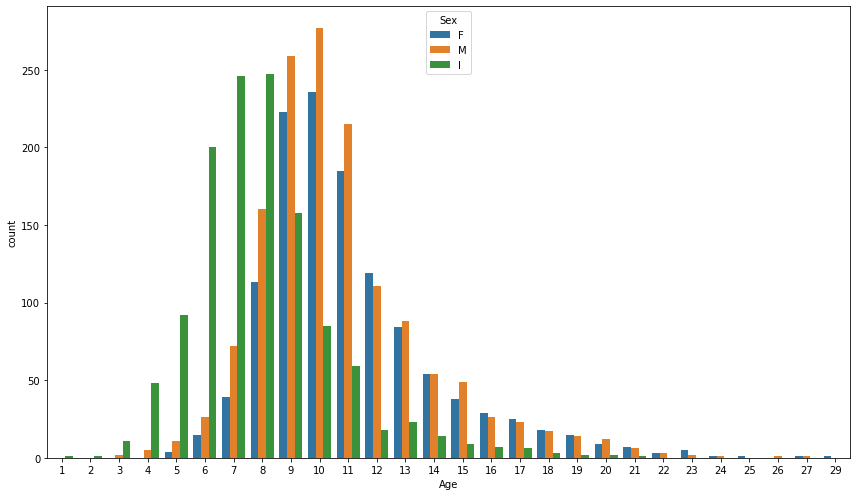

In [16]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="Age", data = crab_data_df, hue='Sex')
# sns.catplot(x='Asthma',hue=None,data = hd_pre_illness_df, kind="count")

# for p in ax.patches:
#    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.29, p.get_height()+0.01)) #<-- To add value on top of graph
# plt.savefig ( "ratio_men_women_raw_df.svg" )
plt.show()

### 3. Whats is the total number of female and male crabs?

<AxesSubplot:xlabel='Sex', ylabel='count'>

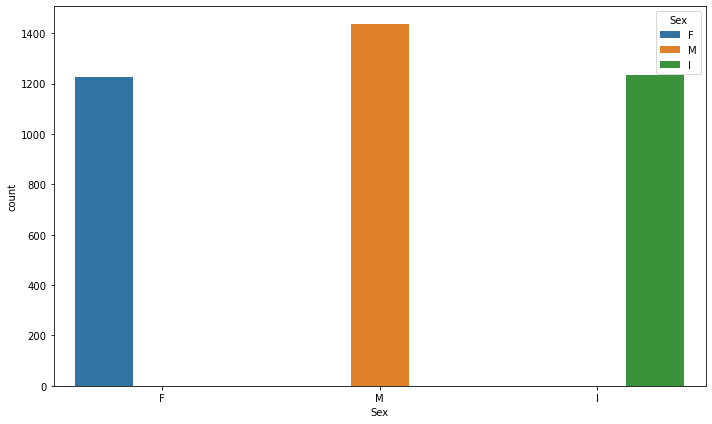

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex", data = crab_data_df, hue='Sex')

### 4. Compare the Age and Weight of Crab

Text(0.5, 1.0, 'Weight vs. Length with Regression Fit')

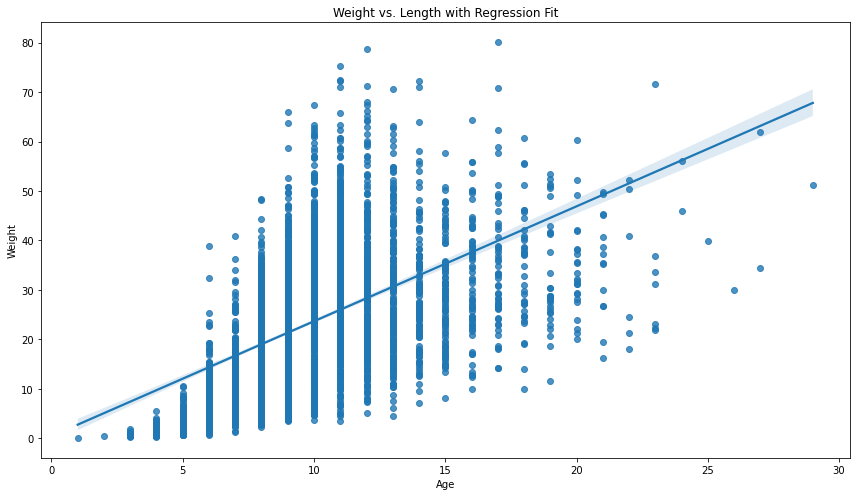

In [18]:
sns.regplot(x='Age', y='Weight', data=crab_data_df)
plt.title('Weight vs. Length with Regression Fit')

### 5. Compare the Age and Height of Crab

Text(0.5, 1.0, 'Age vs. Height with Regression Fit')

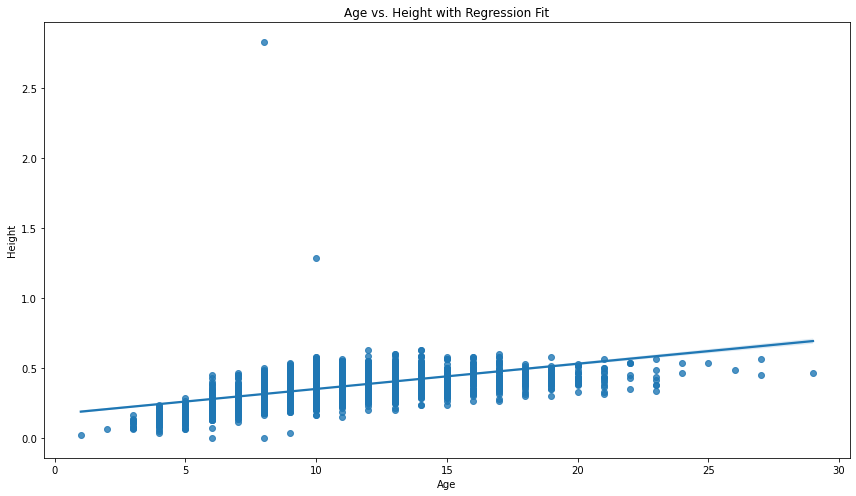

In [19]:
sns.regplot(x='Age', y='Height', data=crab_data_df)
plt.title('Age vs. Height with Regression Fit')

### 6. Compare the Age and Diameter of Crab

Text(0.5, 1.0, 'Age vs. Diameter with Regression Fit')

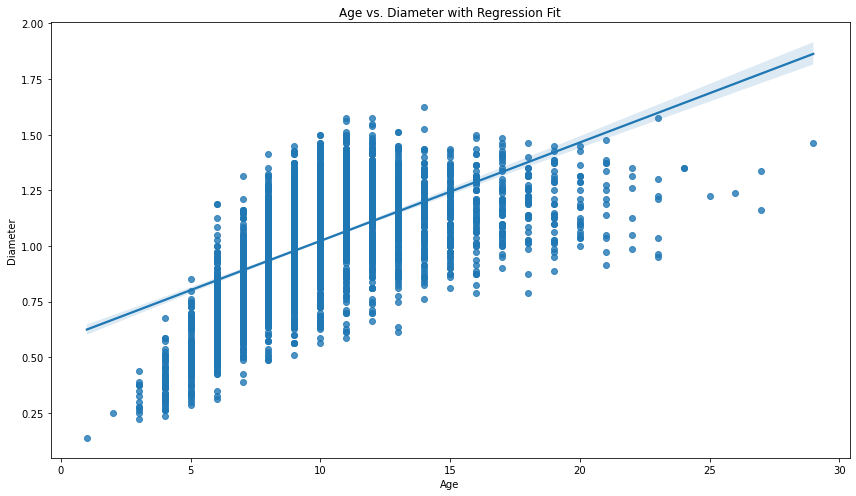

In [21]:
sns.regplot(x='Age', y='Diameter', data=crab_data_df)
plt.title('Age vs. Diameter with Regression Fit')

### 7. Compare the Age and Length of Crab

Text(0.5, 1.0, 'Age vs. Length with Regression Fit')

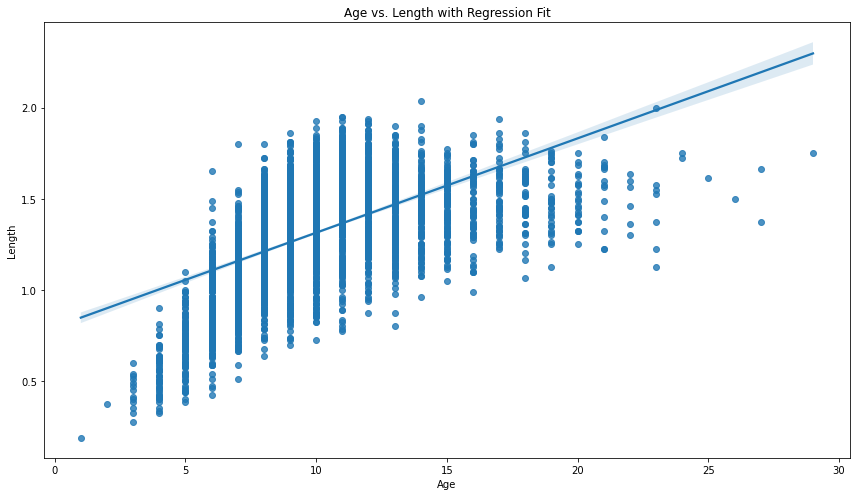

In [22]:
sns.regplot(x='Age', y='Length', data=crab_data_df)
plt.title('Age vs. Length with Regression Fit')

### 8. Compare the Age and Approx Meat Weight of Crab

Text(0.5, 1.0, 'Age vs. Approx Meat Weight')

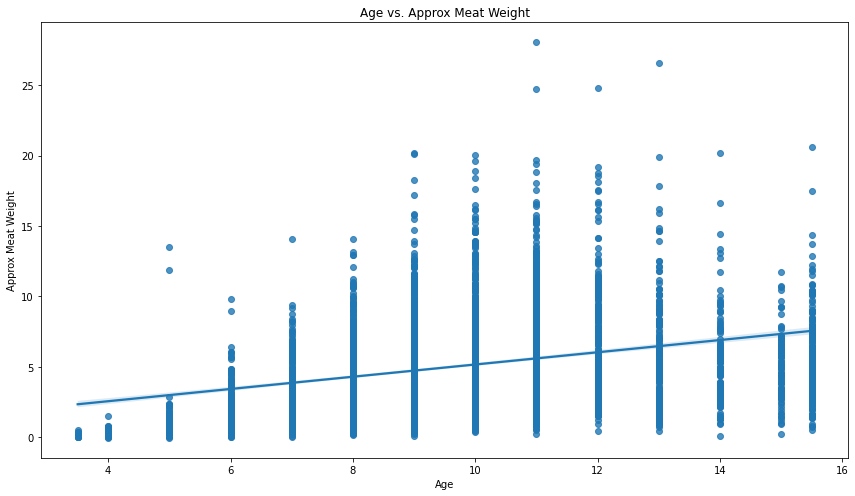

In [85]:
sns.regplot(x='Age', y='Approx Meat Weight', data=crab_data_df, )
plt.title('Age vs. Approx Meat Weight')

## Detecting Outliers

<AxesSubplot:xlabel='Age'>

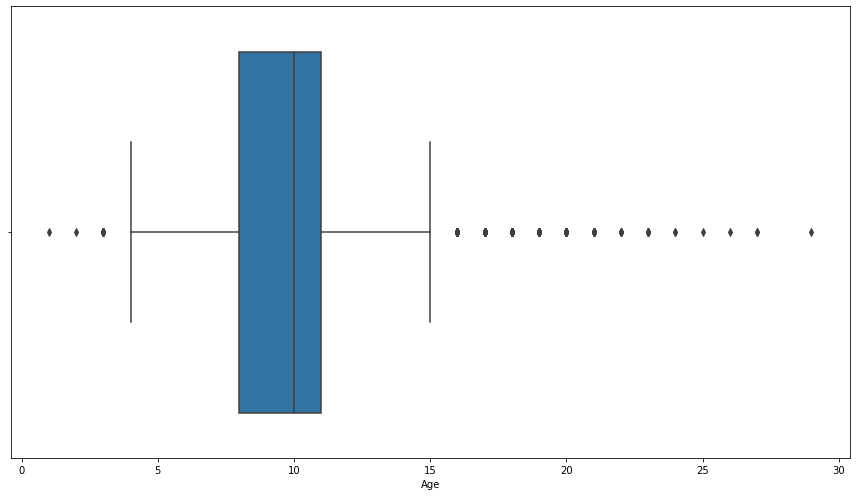

In [23]:
# Age Outliers
sns.boxplot(x=crab_data_df["Age"])

<AxesSubplot:xlabel='Weight'>

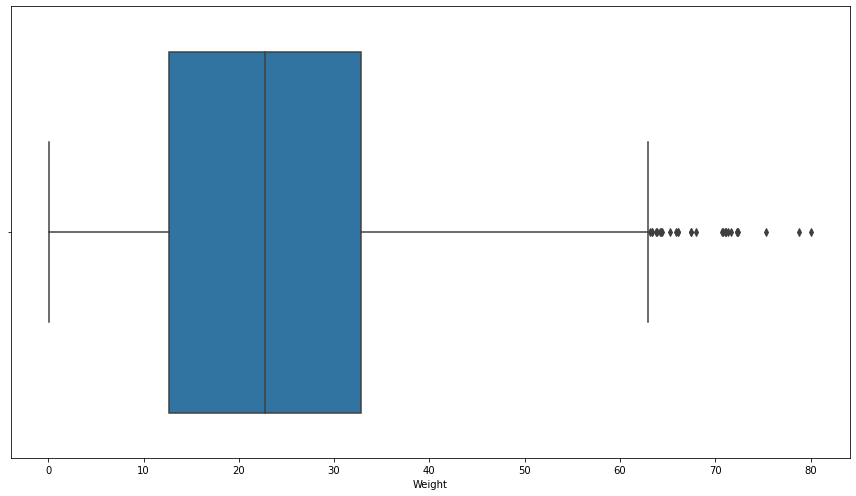

In [24]:
# Weight Outliers
sns.boxplot(x=crab_data_df["Weight"])

<AxesSubplot:xlabel='Length'>

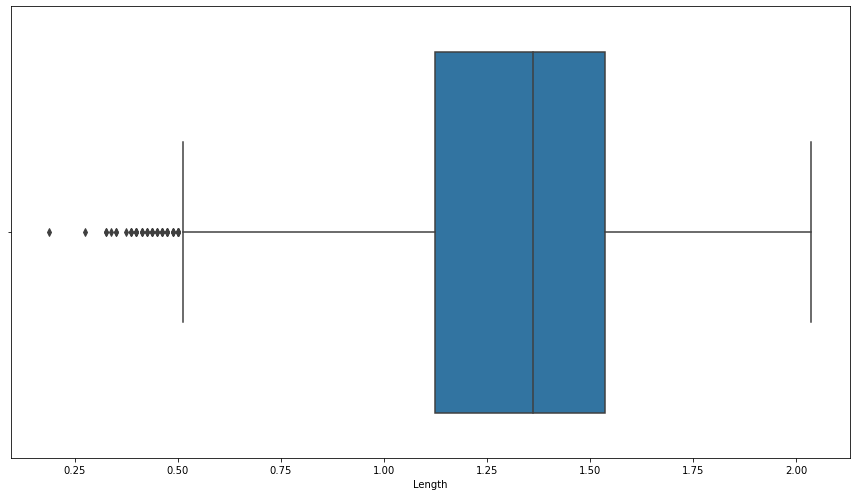

In [25]:
# Length Outliers
sns.boxplot(x=crab_data_df["Length"])

<AxesSubplot:xlabel='Diameter'>

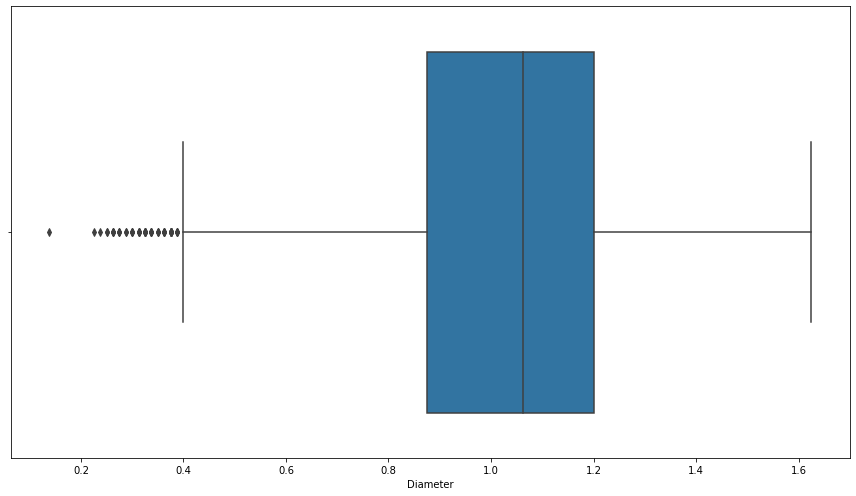

In [26]:
# Diameter Outliers
sns.boxplot(x=crab_data_df["Diameter"])


<AxesSubplot:xlabel='Height'>

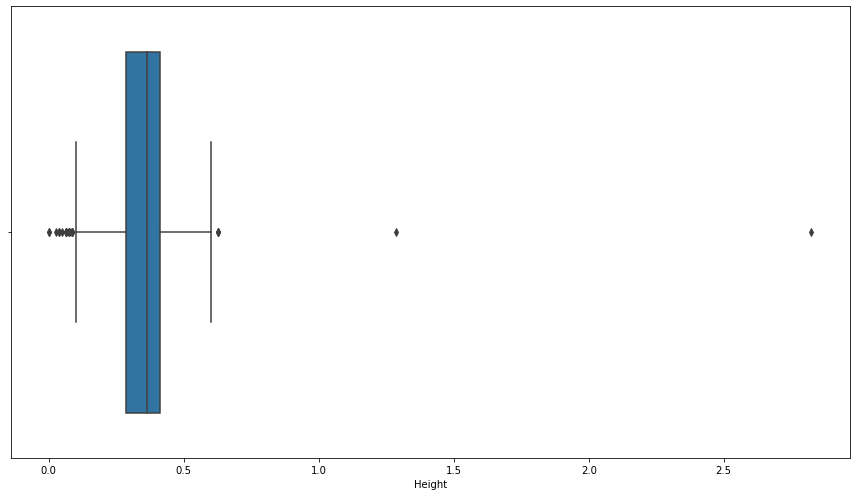

In [27]:
# Age Outliers
sns.boxplot(x=crab_data_df["Height"])

## Capping Outliers

In [81]:
"""Capping Age Outliers"""

percentile25 = crab_data_df['Age'].quantile(0.25)
percentile75 = crab_data_df['Age'].quantile(0.75)

iqr=percentile75-percentile25

up_lmt = percentile75 + 1.5 * iqr
lo_lmt = percentile25 - 1.5 * iqr

crab_data_df['Age'] = np.where(
    crab_data_df['Age'] > up_lmt,
    up_lmt,
    np.where(
        crab_data_df['Age'] < lo_lmt,
        lo_lmt,
        crab_data_df['Age']
    )
)

In [82]:
"""Capping Height Outliers"""

percentile25 = crab_data_df['Height'].quantile(0.25)
percentile75 = crab_data_df['Height'].quantile(0.75)

iqr=percentile75-percentile25

up_lmt = percentile75 + 1.5 * iqr
lo_lmt = percentile25 - 1.5 * iqr

crab_data_df['Height'] = np.where(
    crab_data_df['Height'] > up_lmt,
    up_lmt,
    np.where(
        crab_data_df['Height'] < lo_lmt,
        lo_lmt,
        crab_data_df['Height']
    )
)

In [30]:
"""Capping Length Outliers """
percentile25 = crab_data_df['Length'].quantile(0.25)
percentile75 = crab_data_df['Length'].quantile(0.75)

iqr=percentile75-percentile25

up_lmt = percentile75 + 1.5 * iqr
lo_lmt = percentile25 - 1.5 * iqr

crab_data_df['Length'] = np.where(
    crab_data_df['Length'] > up_lmt,
    up_lmt,
    np.where(
        crab_data_df['Length'] < lo_lmt,
        lo_lmt,
        crab_data_df['Length']
    )
)

In [31]:
"""Capping Diameter Outliers"""
percentile25 = crab_data_df['Diameter'].quantile(0.25)
percentile75 = crab_data_df['Diameter'].quantile(0.75)

iqr=percentile75-percentile25

up_lmt = percentile75 + 1.5 * iqr
lo_lmt = percentile25 - 1.5 * iqr

crab_data_df['Diameter'] = np.where(
    crab_data_df['Diameter'] > up_lmt,
    up_lmt,
    np.where(
        crab_data_df['Diameter'] < lo_lmt,
        lo_lmt,
        crab_data_df['Diameter']
    )
)

In [32]:
"""Capping Weight Outliers"""
percentile25 = crab_data_df['Weight'].quantile(0.25)
percentile75 = crab_data_df['Weight'].quantile(0.75)

iqr=percentile75-percentile25

up_lmt = percentile75 + 1.5 * iqr
lo_lmt = percentile25 - 1.5 * iqr

crab_data_df['Weight'] = np.where(
    crab_data_df['Weight'] > up_lmt,
    up_lmt,
    np.where(
        crab_data_df['Weight'] < lo_lmt,
        lo_lmt,
        crab_data_df['Weight']
    )
)

## After Capping Outcome

<AxesSubplot:xlabel='Weight', ylabel='Density'>

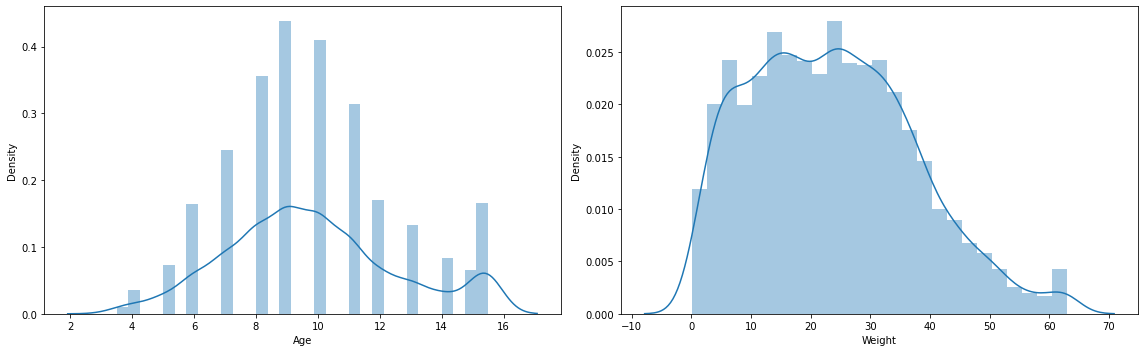

In [83]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(crab_data_df['Age'])
plt.subplot(1,2,2)
sns.distplot(crab_data_df['Weight'])


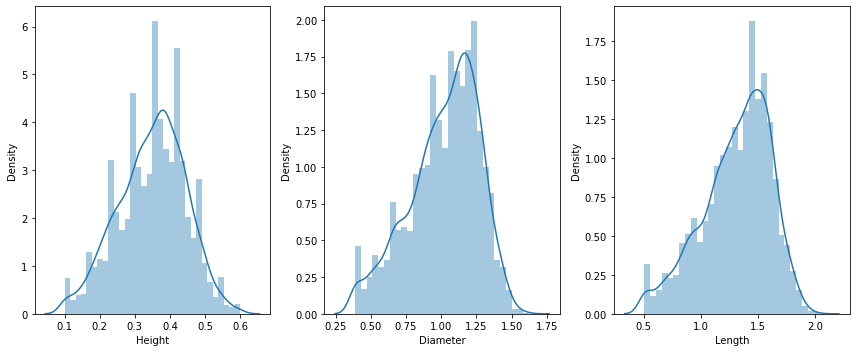

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.distplot(crab_data_df['Height'])
plt.subplot(1,3,2)
sns.distplot(crab_data_df['Diameter'])
plt.subplot(1,3,3)
sns.distplot(crab_data_df['Length'])
plt.show()

In [40]:
crab_data_df.shape

(3893, 13)

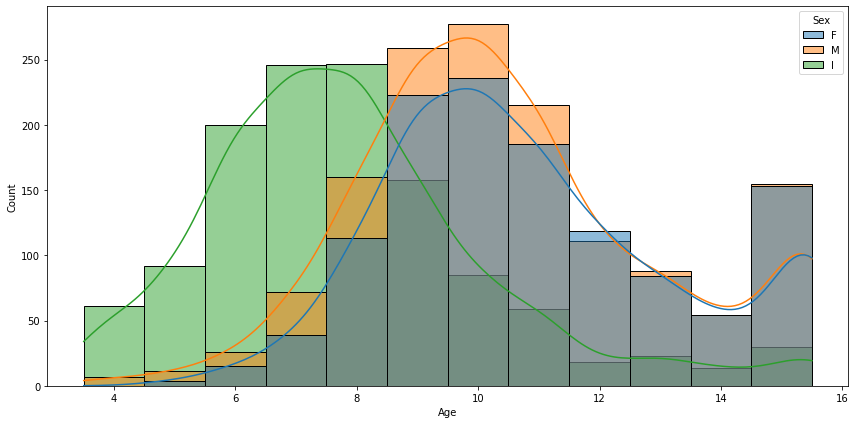

In [42]:
plt.figure(figsize=(12,6))
g = sns.histplot(data = crab_data_df, x = "Age", kde=10, binwidth=1, hue="Sex")

In [43]:
# sns.pairplot(crab_data_df)

# **Machine Learning**

#### ML Algorithm: Linear Regression | **R2 = 0.54 (RMSE = 1.89)**

In [45]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 1.894 
MAE = 1.4678133566535998 
R2 = 0.5417785174552624 
Adjusted R2 = 0.5376182705320287


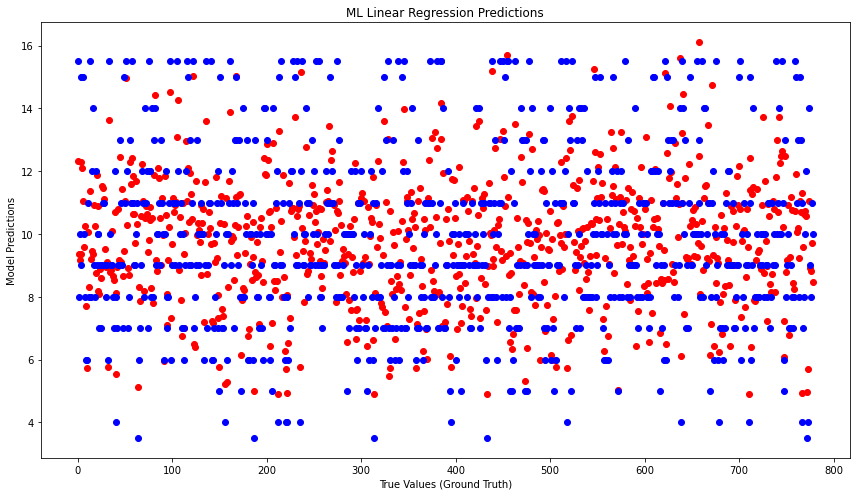

In [46]:
# 70% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train , columns= X_train.columns)


# Transform  X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test , columns= X_test.columns)


# Fitting Linear Regression to the Training set
model_regressor = LinearRegression()
model_regressor.fit(X_train, y_train)
y_predict = model_regressor.predict(X_test)


# Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('ML Linear Regression Predictions')

#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows

# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f')) # How far are you off by
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [47]:
df_lnreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_lnreg.head()

,Actual,Predicted
1385,15.5,12.327369
3888,8.0,9.368941
2554,10.0,9.178922
1593,15.0,12.286600
796,9.0,9.357727


#### ML Algorithm: Lasso Regression | **R2 = 0.3918 (RMSE = 2.15)**

In [48]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 2.15 
MAE = 1.709121979664207 
R2 = 0.3918309656564827 
Adjusted R2 = 0.3863093272123781


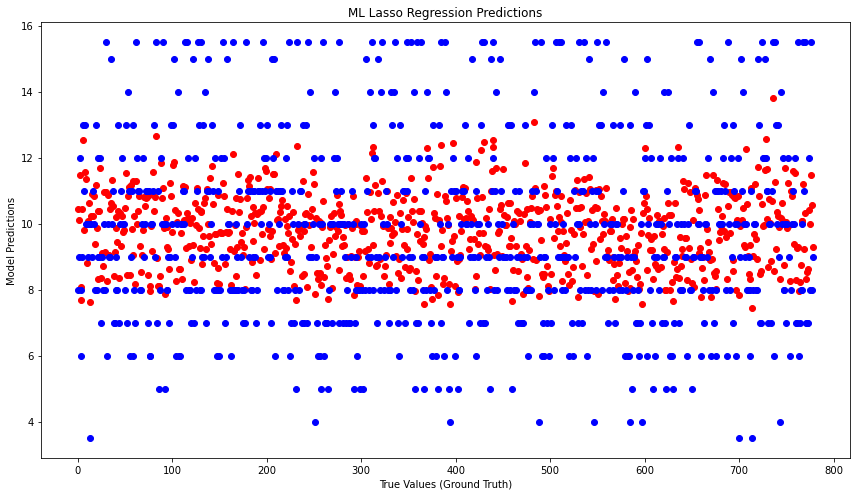

In [49]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train , columns= X_train.columns)


# Transform  X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test , columns= X_test.columns)


# Fitting Lasso Regression to the Training set
model_lasso = Lasso(alpha= 0.7)
model_lasso.fit(X_train, y_train)
y_predict = model_lasso.predict(X_test)


# Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('ML Lasso Regression Predictions')

#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows

# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower


In [50]:
df_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_lasso.head()

,Actual,Predicted
1413,8.0,10.437938
2785,9.0,10.121245
2905,12.0,11.466209
1396,6.0,7.673754
724,8.0,8.068638


#### ML Elasticity | **R2 = 0.51  (RMSE = 1.91)**

In [51]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 1.919 
MAE = 1.5091316298418183 
R2 = 0.5152926487698426 
Adjusted R2 = 0.5108919335187257


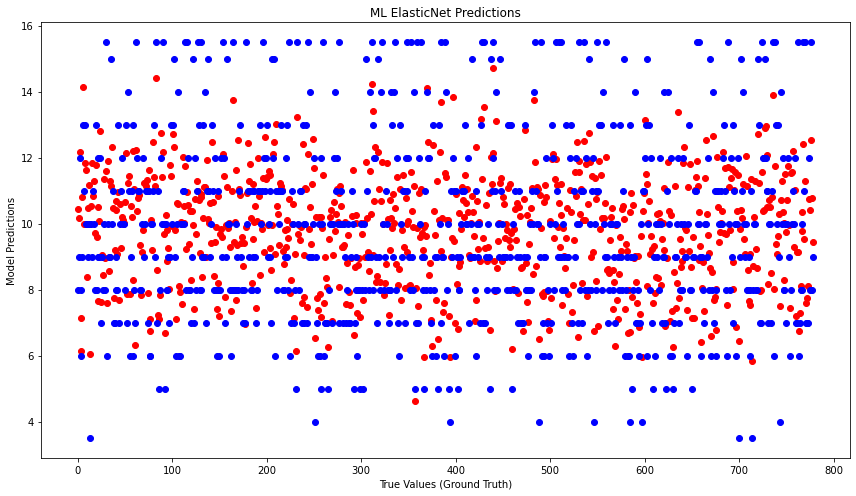

In [52]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting ElasticNet to the Training set
model_elasti = ElasticNet(alpha= 0.2 , l1_ratio= 0.4)
model_elasti.fit(X_train, y_train)
y_predict = model_elasti.predict(X_test)


# Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('ML ElasticNet Predictions')


#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows


# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [53]:
df_elasticnet = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_elasticnet.head()

,Actual,Predicted
1413,8.0,10.436123
2785,9.0,10.164398
2905,12.0,12.186033
1396,6.0,6.136474
724,8.0,7.123579


#### ML Ridge | **R2 = 0.57  (RMSE = 1.82)**

In [54]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 1.816 
MAE = 1.4251324835816574 
R2 = 0.5659218491149359 
Adjusted R2 = 0.5619808023494425


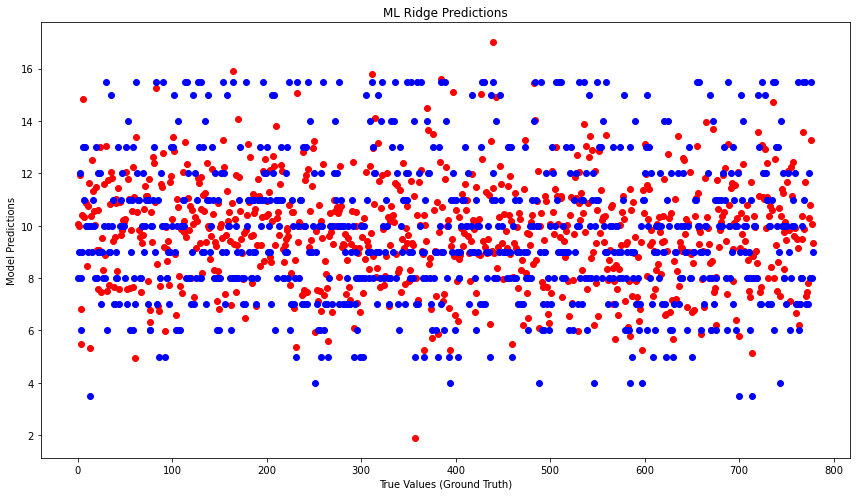

In [55]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting Ridge to the Training set
model_Ridge = Ridge(alpha= 0.3)
model_Ridge.fit(X_train , y_train)
y_predict = model_Ridge.predict(X_test)


# Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('ML Ridge Predictions')

#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows

# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [56]:
df_lnreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_lnreg.head()

,Actual,Predicted
1413,8.0,10.058111
2785,9.0,9.996530
2905,12.0,11.926258
1396,6.0,5.476572
724,8.0,6.835257


In [57]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
1413,8.0,10.058111
2785,9.0,9.996530
2905,12.0,11.926258
1396,6.0,5.476572
724,8.0,6.835257
...,...,...
1073,12.0,10.283987
2871,8.0,10.786558
516,15.5,13.289624
3198,8.0,10.078865


#### ML Decision Tree | **R2 = 0.46 (RMSE = 2.02)**

In [94]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 2.024 
MAE = 1.5890323252752223 
R2 = 0.4607845256548566 
Adjusted R2 = 0.45588892472046494


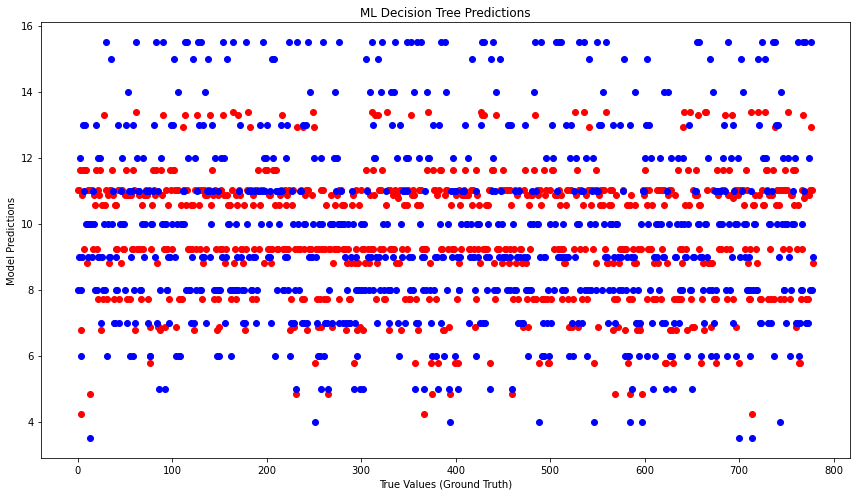

In [95]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting Decision Tree to the Training set
model_DT = DecisionTreeRegressor(max_depth= 4 , max_features= 4, random_state = 1)
model_DT.fit(X_train , y_train)
y_predict = model_DT.predict(X_test)


# Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('ML Decision Tree Predictions')

#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows

# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [60]:
df_dtree = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_dtree.head()

,Actual,Predicted
1413,8.0,11.021193
2785,9.0,11.021193
2905,12.0,11.639151
1396,6.0,4.218182
724,8.0,6.775701


#### ML Polynominal | **R2 = 0.58 (RMSE = 1.78)**

In [92]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 1.786 
MAE = 1.3917296053957038 
R2 = 0.5801640714892775 
Adjusted R2 = 0.5763523315417094


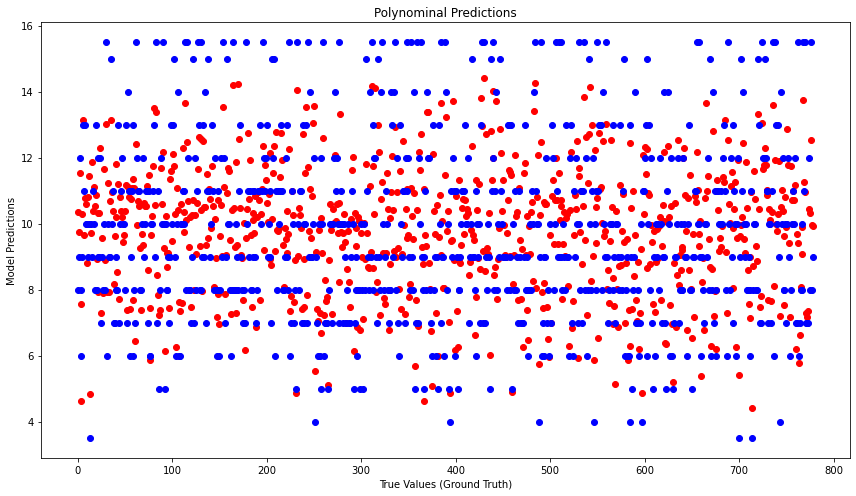

In [93]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting Polynominal to the Training set
model_poly = PolynomialFeatures(degree=1, include_bias=True)
model_poly.fit(X_train)

x_train_trans = model_poly.fit_transform(X_train)
x_test_trans = model_poly.transform(X_test)


#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)


# Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Polynominal Predictions')


#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows


# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f')) # to see how far off is your prediction from the actual value
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [63]:
df_polynominal = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_polynominal.head()

,Actual,Predicted
1413,8.0,11.021193
2785,9.0,11.021193
2905,12.0,11.639151
1396,6.0,4.218182
724,8.0,6.775701


#### ML Random Forrest Regressor | **R2 = 0.58 (RMSE = 1.78)**

In [96]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


RMSE = 1.784 
MAE = 1.3850545571245185 
R2 = 0.5811346980134726 
Adjusted R2 = 0.5773317704986792


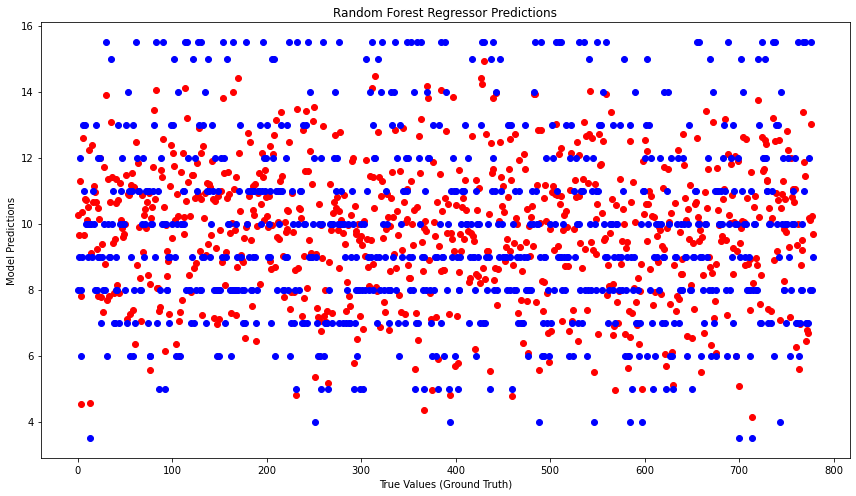

In [97]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting Random Forrest Regressor to the Training set
model_randfor = RandomForestRegressor(200, random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
model_randfor.fit(X_train, y_train)
y_predict = model_randfor.predict(X_test)


#Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Random Forest Regressor Predictions')


#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows

# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [66]:
df_lnreg = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_lnreg.head()

,Actual,Predicted
1413,8.0,10.275
2785,9.0,9.665
2905,12.0,11.290
1396,6.0,4.525
724,8.0,7.810


#### ML XGBOOST | **R2 = 0.52 (RMSE = 1.90)**

In [98]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 1.906 
MAE = 1.4528668036968932 
R2 = 0.5219587671027996 
Adjusted R2 = 0.5176185743268199


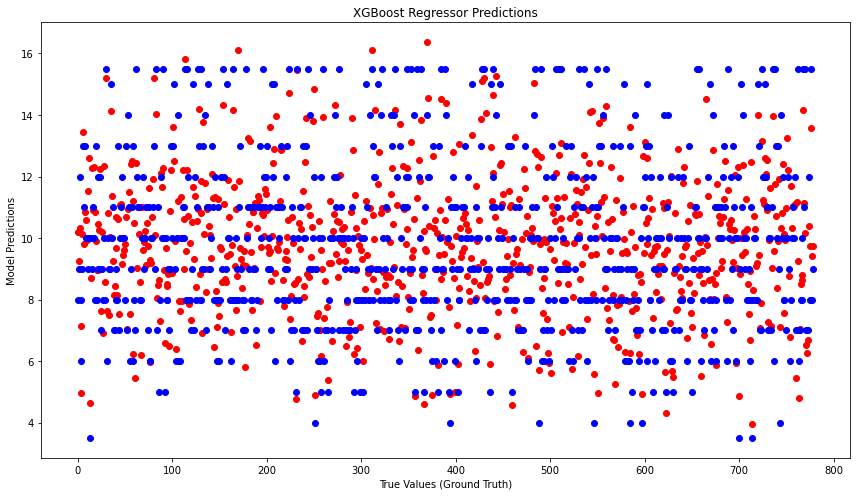

In [99]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting XGBoost Regressor to the Training set
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
y_predict = model_xgb.predict(X_test)


#Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('XGBoost Regressor Predictions')


#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows

# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [69]:
df_xgboost = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_xgboost.head()

,Actual,Predicted
1413,8.0,10.198409
2785,9.0,9.252563
2905,12.0,10.335356
1396,6.0,4.971799
724,8.0,7.139671


#### ML Gradient Boosting | **R2 = 0.58 (RMSE = 1.78)**

In [100]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 1.778 
MAE = 1.3786791449132134 
R2 = 0.5838614862117237 
Adjusted R2 = 0.5800833155288212


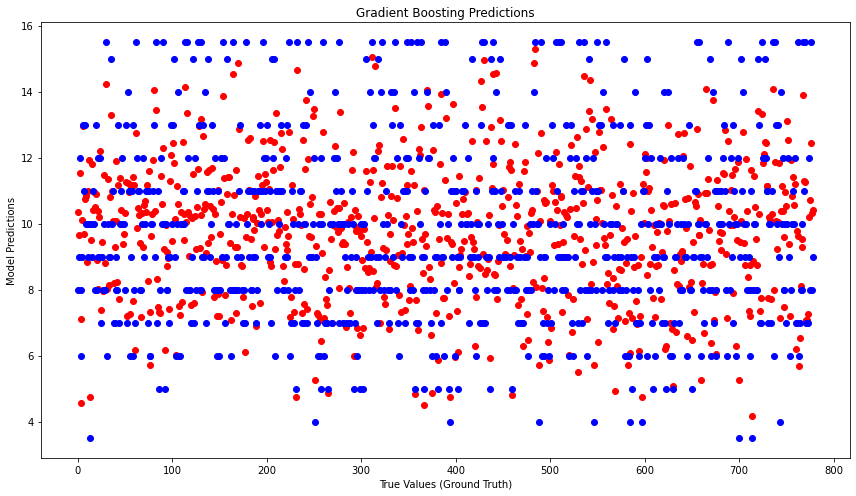

In [101]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting Gradient Boosting to the Training set
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, y_train)
y_predict = model_gbr.predict(X_test)


#Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Gradient Boosting Predictions')


#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows

# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [72]:
df_gdboost = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_gdboost.head()

,Actual,Predicted
1413,8.0,10.366327
2785,9.0,9.659703
2905,12.0,11.525656
1396,6.0,4.572417
724,8.0,7.099993


#### ML SVR | **R2 = 0.58  (RMSE = 1.79)**

In [102]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

RMSE = 1.786 
MAE = 1.3363419829480645 
R2 = 0.580141911154944 
Adjusted R2 = 0.5763299700110849


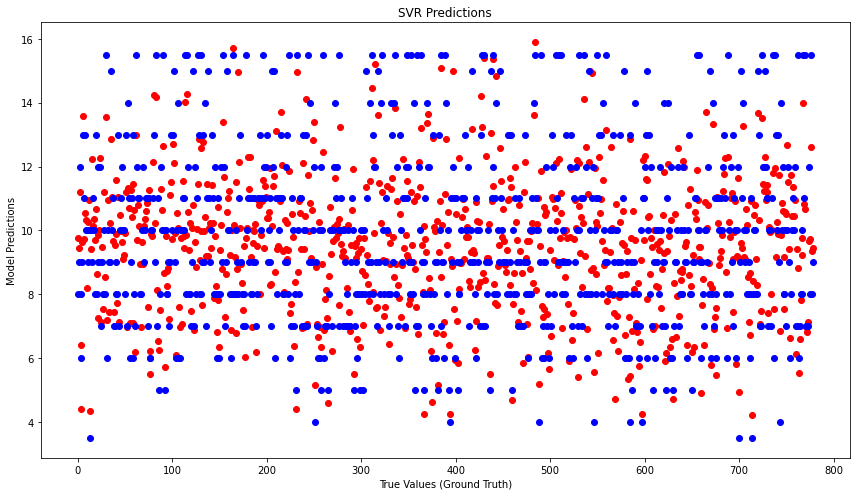

In [103]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting SVR to the Training set
model_svr = SVR(kernel = 'rbf')
model_svr.fit(X_train, y_train)
y_predict = model_svr.predict(X_test) 


#Visualize the performance of model output of predicted y values against the true y values of test set using a scatterplot
plt.scatter(range(len(y_predict)), y_predict, color='red') # Red for predicted value
plt.scatter(range(len(y_test)), y_test, color='blue')  # Blue for actual value

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('SVR Predictions')


#Compute the performance on test set using metrics r2_score, RMSE, MAE 
k = X_test.shape[1]  # no features
n = len(X_test)   # no rows

# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

In [75]:
df_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df_svr.head()

,Actual,Predicted
1413,8.0,9.763626
2785,9.0,9.464229
2905,12.0,11.189293
1396,6.0,4.415076
724,8.0,6.412508


### **Feature Selection for Regression Model**

Feature 0: 1432.268588
Feature 1: 1578.752859
Feature 2: 1794.773281
Feature 3: 675.027236
Feature 4: 1081.571457
Feature 5: 1883.891180
Feature 6: 314.028732


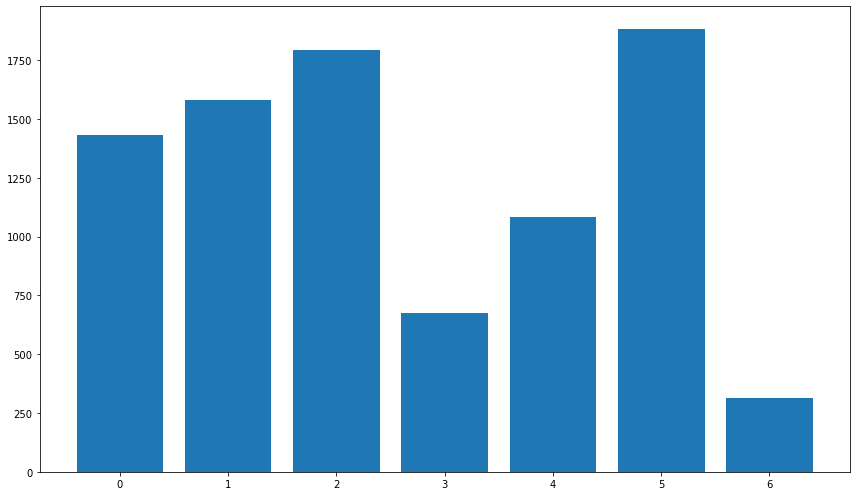

In [76]:
# source from: https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

sel_ft_df = crab_data_df.loc[ : , ['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']] # Dont need smote for feature selection

# feature selection
def select_features(X_train, y_train, X_test):

 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 
 # learn relationship from training data
 fs.fit(X_train, y_train)

 # transform train input data
 X_train_fs = fs.transform(X_train)

 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

# load the dataset
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight','Approx Meat Weight']]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# **Hyper Parameter Tuning** | Final: R2 = 0.58  (RMSE = 1.78 )

In [104]:
# Use GridSearchCV to tune hyperparameters

# y = crab_data_df ['Age']
# X = crab_data_df[['Length', 'Diameter', 'Height', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']]

# # 80% of the data to training set while 20% of the data to test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

parameters = {'learning_rate': [0.03],
                  'subsample'    : [0.8],
                  'n_estimators' : [119],
                  'max_depth'    : [4]
                 }

grid_search = GridSearchCV(estimator=model_gbr, param_grid=parameters, cv=5, verbose=2)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.03, max_depth=4, n_estimators=119, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.03, max_depth=4, n_estimators=119, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.03, max_depth=4, n_estimators=119, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.03, max_depth=4, n_estimators=119, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.03, max_depth=4, n_estimators=119, subsample=0.8; total time=   0.6s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.03], 'max_depth': [4],
                         'n_estimators': [119], 'subsample': [0.8]},
             verbose=2)

In [105]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=119,
                          subsample=0.8)

 The best score across ALL searched params:
 0.5731568831597383

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 119, 'subsample': 0.8}


In [106]:
y = crab_data_df ['Age']
X = crab_data_df[['Length', 'Diameter', 'Height','Shucked Weight','Shell Weight','Approx Meat Weight']] # added shucked weight feature since the score is poor

# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# Scale X train
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)


# Transform X_test in same way as X_train
scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)


# Fitting Gradient Boosting to the Training set
model_gbr = GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=119, subsample=0.8)
model_gbr.fit(X_train, y_train)
y_predict = model_gbr.predict(X_test)


# Metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2) 


RMSE = 1.781 
MAE = 1.3880557245514797 
R2 = 0.5824737575246829


In [107]:
# Cross validation check
cross_val_score(model_gbr, X, y, cv=5).mean()

0.578515629816628